In [2]:
import numpy as np
import matplotlib.pyplot as plt
import eat
import pandas as pd
from models.modelsFDH import FDH

In [3]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri


In [4]:
rx = 'x <- c('
for entry in x.flatten():
    rx = rx + str(entry) + ','
rx

NameError: name 'x' is not defined

In [37]:
ry = 'y <- c('
for entry in y.flatten():
    ry = ry + str(entry) + ','
ry

'y <- c(3.5644464177856565,8.055397770531908,1.8238251434821255,3.1057582500897816,9.996232380934009,5.422552630519209,9.190551780275541,3.1604431867440796,7.125749958387972,9.080295915853915,2.846943531863861,7.5877788477258665,6.452657329307907,8.11494085195801,6.956753730582307,7.917989543906644,6.011693066960497,9.71528438783515,3.8164570676934653,2.8765881491334397,6.625696366031516,8.82374147152114,5.448043523197436,3.224122472617423,2.6478872620025684,2.9963495135351965,3.618371410648689,7.434549478218631,8.511243253865496,6.480057109044994,8.163637491815937,8.844207303072169,3.1143986104688097,6.263986155340545,4.298379707265932,4.638187478177276,6.268384002017786,8.557575425391219,4.854852766112574,2.8292232034453093,4.060850669785081,5.731558826750707,2.394147136545606,6.97317287335725,4.834103386929602,2.439424435787166,3.8054826924001097,5.351538084694696,7.124380064085964,2.03122968430098,2.652809741038919,9.427264576149327,5.680623143918475,1.650785696161658,4.81906871128

In [ ]:
pandas2ri.activate()

In [32]:
# Create a combined converter with default and pandas2ri converters
converter = ro.default_converter + pandas2ri.converter
with converter.context():
    # Convert pandas DataFrame to R data frame
    r_df = ro.conversion.py2rpy(df)
    # Assign the R data frame to the R environment
    ro.globalenv['r_df'] = r_df


In [13]:
x = np.random.uniform(1, 10, size=(100, 1))
y = np.random.uniform(1, 10, size=(100, 1))


In [ ]:
fdh = FDH(x, y)
fdh.fdh_output_vrs()

,DMU,efficiency,is_efficient
0,0,2.804428,False
1,1,1.193167,False
2,2,5.269931,False
3,3,3.218613,False
4,4,1.000000,True
...,...,...,...
95,95,3.917766,False
96,96,1.000000,True
97,97,1.447355,False
98,98,1.194510,False


In [16]:
df = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})


In [5]:
df

NameError: name 'df' is not defined

In [7]:
scores = pd.read_csv("/Users/harshit/scores_EAT.csv")

In [9]:
def stats(df, col):
    avg_eff = df[col].mean()
    min_eff = df[col].min()
    max_eff = df[col].max()
    std_dev_eff = df[col].std()
    num_eff = (df[col]==1).sum()
    num_considered = len(df)

    result = {
        'avg': avg_eff,
        'min': min_eff,
        'max': max_eff,
        'std_dev': std_dev_eff,
        'num_eff': num_eff,
        'num_considered': num_considered
    }
    return result


In [10]:
scores

,EAT_BCC_OUT,FDH_BCC_OUT
0,2.804,2.804
1,1.241,1.193
2,5.481,5.270
3,3.219,3.219
4,1.000,1.000
...,...,...
95,3.918,3.918
96,1.040,1.000
97,1.447,1.447
98,1.195,1.195


In [11]:
stats(scores, 'EAT_BCC_OUT')

{'avg': np.float64(2.32736),
 'min': np.float64(1.0),
 'max': np.float64(6.857),
 'std_dev': np.float64(1.5013569789300005),
 'num_eff': np.int64(2),
 'num_considered': 100}

In [12]:
stats(scores, 'FDH_BCC_OUT')

{'avg': np.float64(2.29497),
 'min': np.float64(1.0),
 'max': np.float64(6.857),
 'std_dev': np.float64(1.491953180237303),
 'num_eff': np.int64(8),
 'num_considered': 100}

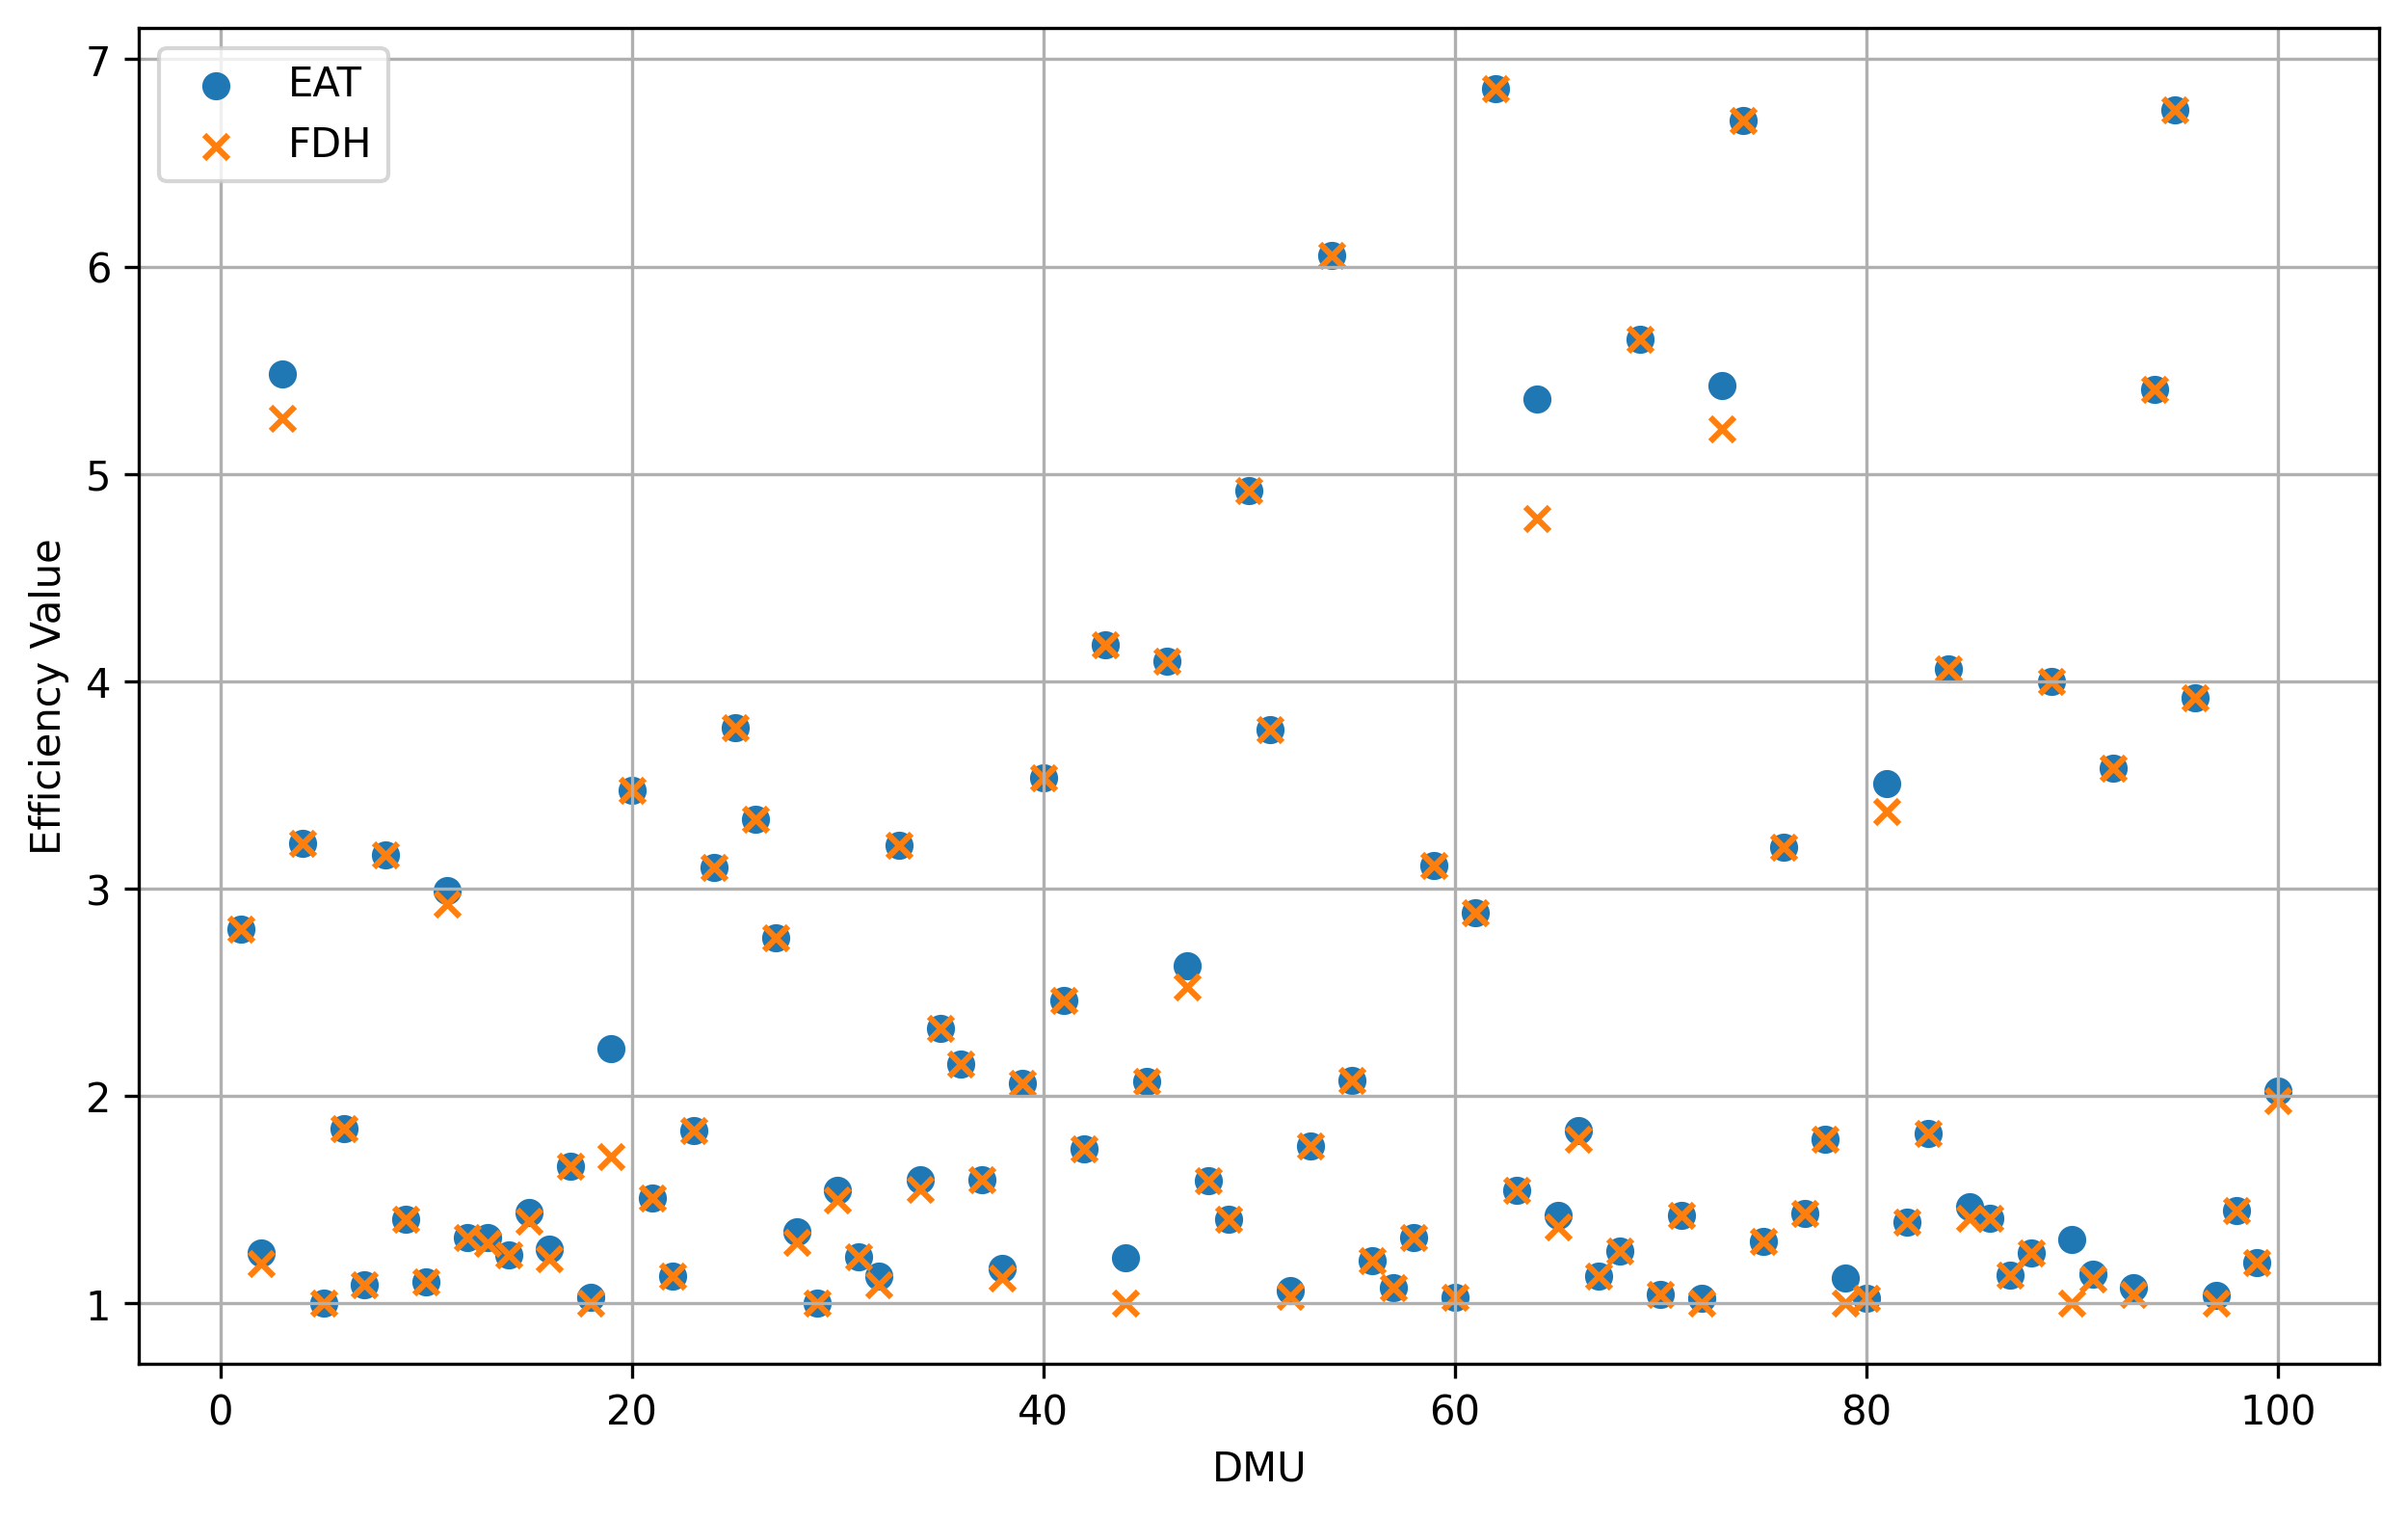

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = scores
plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(range(1, 101), df['EAT_BCC_OUT'], label='EAT', marker='o')
plt.scatter(range(1, 101), df['FDH_BCC_OUT'], label='FDH', marker='x')

plt.xlabel('DMU')
plt.ylabel('Efficiency Value')
plt.legend()

plt.grid(True)
plt.show()


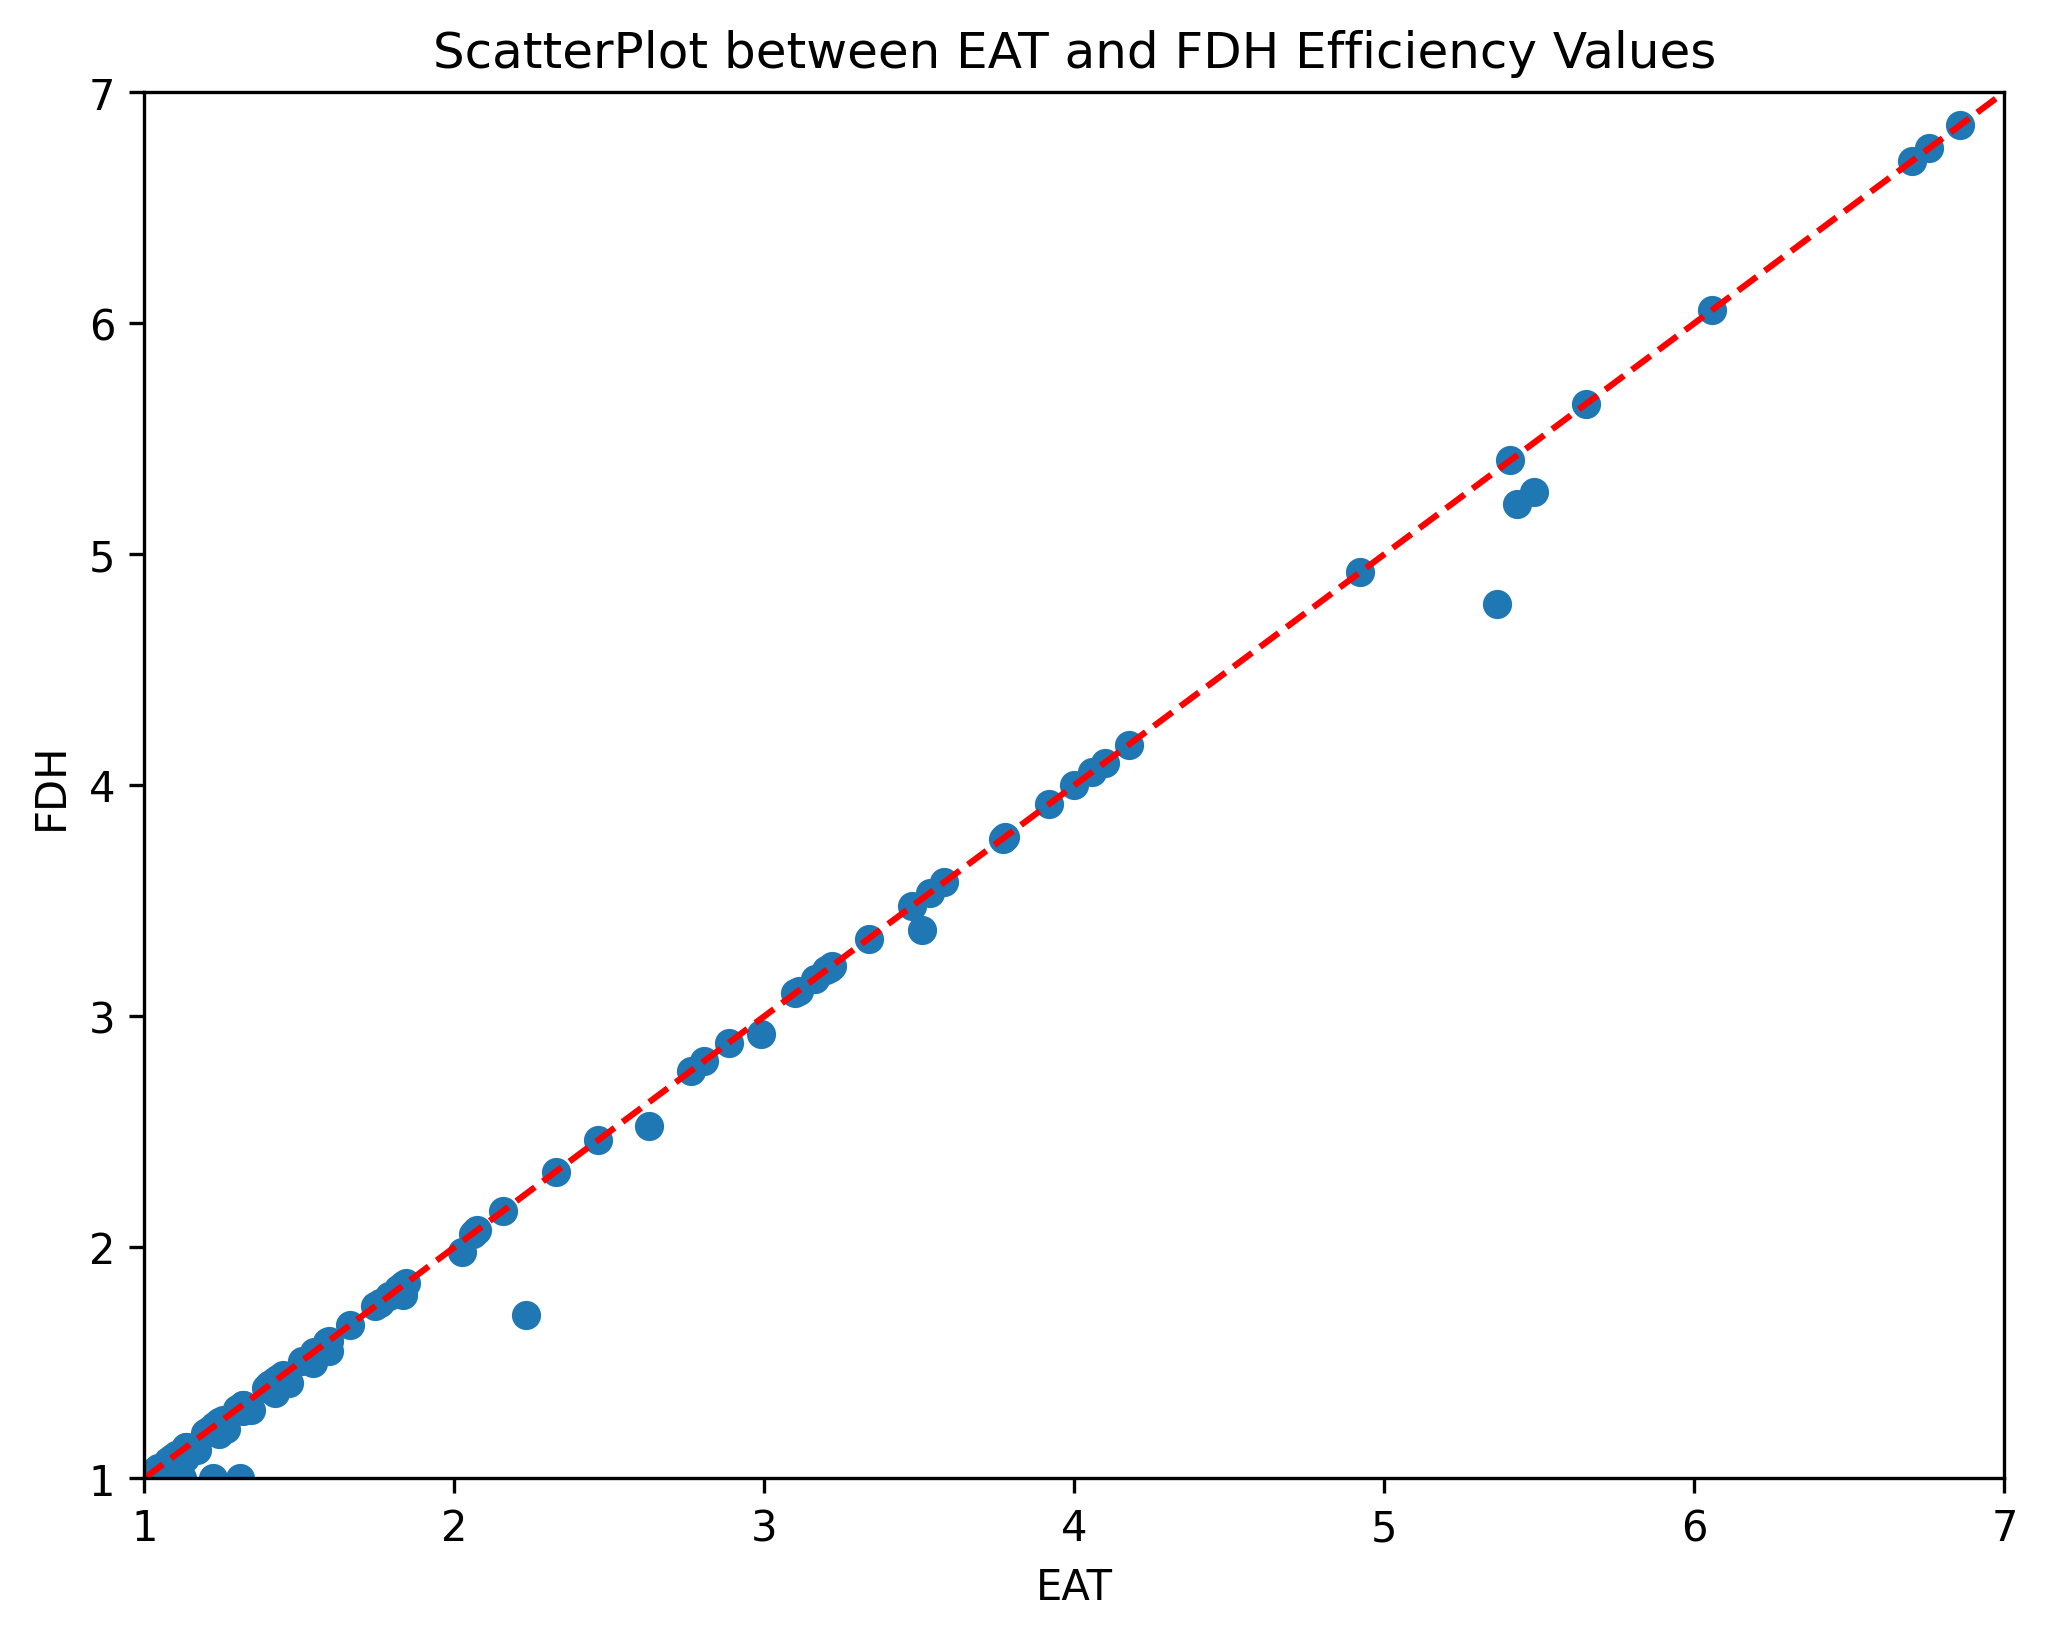

In [23]:

plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(scores['EAT_BCC_OUT'], scores["FDH_BCC_OUT"])
plt.plot([1, 7], [1, 7], color='red', linestyle='--')  # diagonal line
plt.xlim(1,7)
plt.ylim(1,7)
plt.xlabel('EAT')
plt.ylabel('FDH')
plt.title('ScatterPlot between EAT and FDH Efficiency Values')
plt.show()

In [27]:
x = np.array([6.286682513272249,3.2504566761852876,3.008974572174621,5.0063317847445905,3.8062663824175176,7.7182358788089465,9.298989582149947,7.380667701138499,7.517862259982743,5.857473209122477,1.6063016476062066,5.778947914818532,1.68897284211557,4.324516169379319,3.726819098789289,2.742165382505988,8.969657001978712,3.473374737399764,1.0919621924999117,5.266395671713571,8.349879836907968,7.898811046869387,4.805056399909469,3.852103862947149,8.583666147677773,9.482387093365265,5.177060563429267,2.4455888360103253,2.1656914275843655,3.7381836733942495,4.800736534506929,2.826297866298059,9.355477150653918,3.7661648519789406,4.242383800091716,8.313849551736546,8.627394898858878,2.7095048789998453,6.593868750059528,6.710675864886494,7.788695146813232,8.75624515243573,3.8796717090308475,1.217130967464576,5.1456708305810155,8.640602848346,3.0940304841837514,2.1779255991438724,4.359020684582985,9.902449121394005,6.643153005257112,3.7391556088665006,8.778748616642957,4.2789082534302345,4.022129771723008,9.131210857041939,8.758794545734524,8.169416709695174,3.8310741629651592,4.9519830297738725,5.326340135223102,6.295117387761933,7.8829997695591345,1.3657293358262348,2.824869392816494,2.0541251512868355,8.692437738650765,5.303189744179637,6.126240171643,8.251470630477751,4.567687905608632,1.4647653982553548,3.240623304341679,8.722129171963672,9.977419607696914,3.989844785368472,5.364492240085705,7.121141097456508,1.3502653064744874,9.499824805287389,3.2214798047543574,8.830981758379892,6.271545454299312,8.390851800789275,3.1517105710551028,5.2895304606910605,7.65411705980726,5.879419554073202,9.973656050278894,1.063410186297663,2.110645694771338,8.192099911379174,3.551222456334128,8.7439067174842,5.491500908523724,6.874375870126633,2.4017835241029153,7.214813408254372,8.693778063985304,1.710145107387523])             
y = np.array([3.5644464177856565,8.055397770531908,1.8238251434821255,3.1057582500897816,9.996232380934009,5.422552630519209,9.190551780275541,3.1604431867440796,7.125749958387972,9.080295915853915,2.846943531863861,7.5877788477258665,6.452657329307907,8.11494085195801,6.956753730582307,7.917989543906644,6.011693066960497,9.71528438783515,3.8164570676934653,2.8765881491334397,6.625696366031516,8.82374147152114,5.448043523197436,3.224122472617423,2.6478872620025684,2.9963495135351965,3.618371410648689,7.434549478218631,8.511243253865496,6.480057109044994,8.163637491815937,8.844207303072169,3.1143986104688097,6.263986155340545,4.298379707265932,4.638187478177276,6.268384002017786,8.557575425391219,4.854852766112574,2.8292232034453093,4.060850669785081,5.731558826750707,2.394147136545606,6.97317287335725,4.834103386929602,2.439424435787166,3.8054826924001097,5.351538084694696,7.124380064085964,2.03122968430098,2.652809741038919,9.427264576149327,5.680623143918475,1.650785696161658,4.819068711283006,8.290568516088287,9.287237586107985,7.589308127526424,3.2135308394687723,9.737239293716364,3.4650365673935966,1.4579156869383485,6.465883537447449,1.5868933795752267,7.028210540364394,4.644268921733584,8.833686317896213,7.977608166394944,1.7690428314314075,9.58068483506406,7.022941083220968,8.323867916842278,1.8419674630030798,1.4912429328842522,7.6920619677003765,3.125160711719559,6.974923187189042,5.5862920871533515,7.5930927997621644,9.762188740995354,2.8507350319663938,7.1876025127617025,5.500148613377824,2.4632968715483505,6.8133304896266065,7.0793905309704614,8.80389097483911,8.05369782288466,2.4996160096163176,6.512008731038574,7.4653055525362975,2.7933375977031103,9.302502811021919,1.8490010644303951,1.4793060576152888,2.55151369717313,9.611432308233088,6.9065529957646925,8.368482889990139,4.20658382625063])
eatscores = scores['EAT_BCC_OUT']

In [29]:
ypredeat = y * eatscores

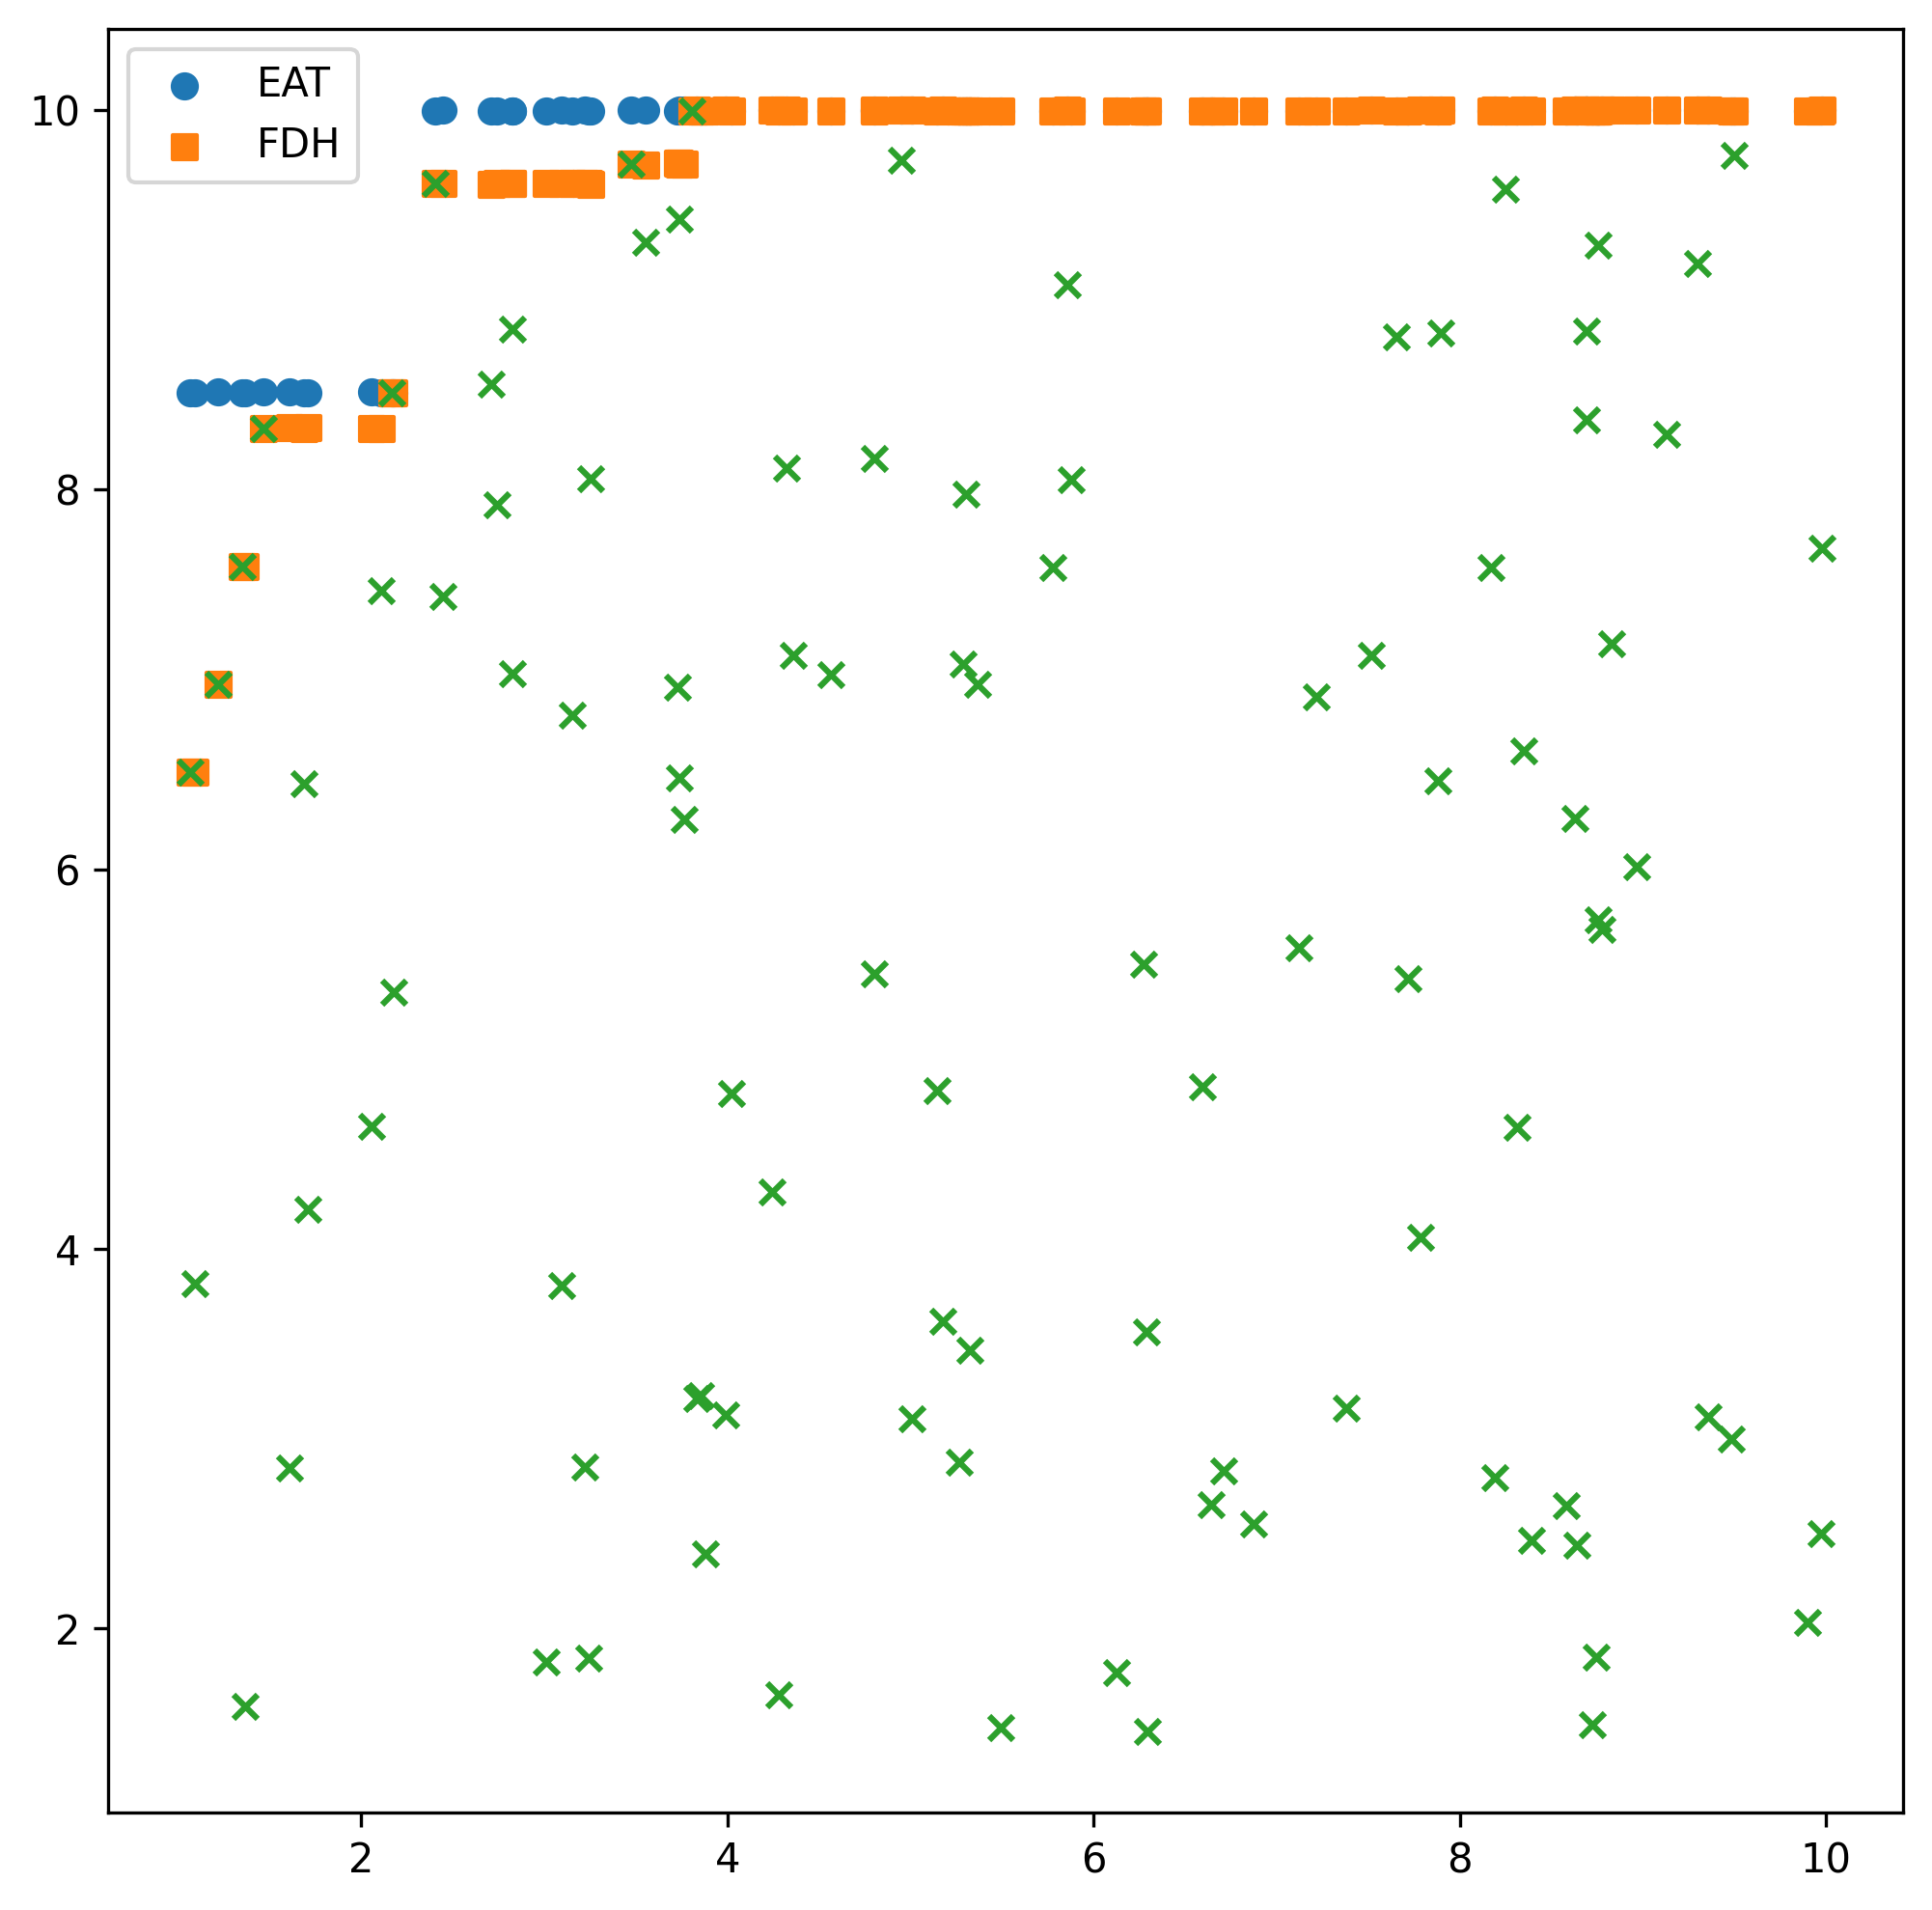

In [39]:
plt.figure(figsize=(8, 8), dpi = 300)
plt.scatter(x, ypredeat, label='EAT')
plt.scatter(x, ypredfdh, label='FDH', marker='s')
plt.scatter(x, y, marker='x')
plt.legend()

In [31]:
ypredfdh = y * scores['FDH_BCC_OUT']

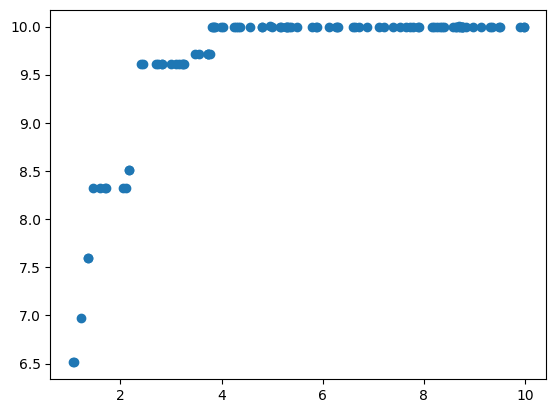

In [32]:
plt.scatter(x, ypredfdh)

In [18]:
eatmodel = eat.EAT(df, ['x'], ['y'], numStop=1, fold=5)
eatmodel.fit()

In [22]:
scrs = eat.Scores(df, ['x'], ['y'], eatmodel.tree)

In [23]:
scrs.BCC_output_EAT()

-- cannot find parameters matching version: , using: 22.1.1.0


DOcplexException: Cannot solve model: no CPLEX runtime found.